# Customer Conversion Prediction 

#### Life cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Model Training
- Choose best model

### 1. Problem Statement
- This project

### 2. Data Collection
-Dataset Source - 


### 2.1 Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
#Dataset path setup
os.chdir("data")

#### Import the CSV Data as Panda DataFrame

In [3]:
df =pd.read_csv("input_training_data.csv")

#### Show Top 5 Records

In [4]:
df.head()

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,8568,0,0.0,0,0.0,2,0.000000,0.2,0.200000,0.0,0.0,Aug,1,1,3,1,Returning_Visitor,0,0
1,9207,1,5.0,0,0.0,2,15.200000,0.0,0.040000,0.0,0.0,Aug,1,1,6,3,Returning_Visitor,0,0
2,9321,0,0.0,0,0.0,3,0.000000,0.2,0.200000,0.0,0.0,Aug,1,1,3,4,Returning_Visitor,0,0
3,8955,4,54.8,0,0.0,3,20.257143,0.0,0.028571,0.0,0.0,Aug,1,1,3,2,Returning_Visitor,0,0
4,8180,0,0.0,0,0.0,4,39.800000,0.0,0.050000,0.0,0.0,Aug,1,1,1,3,New_Visitor,0,0


##### Shape of the dataset

In [5]:
df.shape

(8622, 19)

### 2.2 Dataset Information
- **ID**: Unique Identifier of a visitor
- **Administrative** : Number of Administrative pages customer visited
- **Administrative Duration**: How long has the visitor stayed in the Administrative pages
- **Informational**: Number of types of informational pages visited
- **Informational Duration**: How long has the visitor stayed in the informational pages
- **Product Related**: Number of Product related pages the visitor has visited
- **Product Related Duration**: How long has the visitor spent in the product related pages
- **Exit Rate**: Exit rate of each customer per page
- **Bounce Rate**: Bounce rate of each customer per page
- **Page Values**: Average number of the shop pages that a user visited before completing a transaction
- **Special Day**: Closeness of the site visiting time to a special day, varies between 0 and 1, in steps of 0.2 with perhaps 1 meaning that the date is closest or on the special day like Mother’s day. 
- **Month**: the month in which each customer visited
- **Operating System** : Type of the operating systems that each customers use
- **Browser**: Type of the internet browser that each customer use (1 to 13)
- **Region**: The region where the customer is located (1 to 9)
- **Traffic Type**: The internet traffic type
- **Visitor Type**: The type of customer (existing vs. new)
- **Weekend**: Whether the customer has visited the site on weekend or not (0=FALSE, 1= TRUE)

Target Feature:
- **Revenue**: Whether the customer's visit had resulted in revenue (0=FALSE, 1= TRUE)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check Data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [6]:
df.isna().sum()

ID                         0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

#### There are no duplicate values in the data set

### 3.3 Check Data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8622 entries, 0 to 8621
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       8622 non-null   int64  
 1   Administrative           8622 non-null   int64  
 2   Administrative_Duration  8622 non-null   float64
 3   Informational            8622 non-null   int64  
 4   Informational_Duration   8622 non-null   float64
 5   ProductRelated           8622 non-null   int64  
 6   ProductRelated_Duration  8622 non-null   float64
 7   BounceRates              8622 non-null   float64
 8   ExitRates                8622 non-null   float64
 9   PageValues               8622 non-null   float64
 10  SpecialDay               8622 non-null   float64
 11  Month                    8622 non-null   object 
 12  OperatingSystems         8622 non-null   int64  
 13  Browser                  8622 non-null   int64  
 14  Region                  

### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

ID                         8622
Administrative               25
Administrative_Duration    2574
Informational                17
Informational_Duration      947
ProductRelated              286
ProductRelated_Duration    6953
BounceRates                1446
ExitRates                  3561
PageValues                 1865
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      12
Region                        9
TrafficType                  19
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

### 3.5 Check statistics of data set

In [10]:
df.describe()

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000
mean,8015.889121,2.343192,83.405240,0.490373,33.159578,31.872419,1192.184366,0.021920,0.042457,5.704339,0.061795,2.124101,2.349803,3.154605,4.117606,0.233820,0.154836
std,2491.319819,3.315094,182.985925,1.258803,138.432097,44.605549,1944.264408,0.047651,0.047784,17.776590,0.199441,0.914461,1.719077,2.409020,4.070923,0.423284,0.361770
min,3701.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5859.250000,0.000000,0.000000,0.000000,0.000000,7.000000,192.462500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,8016.500000,1.000000,9.000000,0.000000,0.000000,18.000000,606.283333,0.003279,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,10172.750000,4.000000,95.575000,0.000000,0.000000,37.000000,1450.841355,0.017497,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,12330.000000,26.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,360.953384,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


#### Insight
- From above description of numerical data, 

### 3.7 Exploring Data

In [11]:
df.head()

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,8568,0,0.0,0,0.0,2,0.000000,0.2,0.200000,0.0,0.0,Aug,1,1,3,1,Returning_Visitor,0,0
1,9207,1,5.0,0,0.0,2,15.200000,0.0,0.040000,0.0,0.0,Aug,1,1,6,3,Returning_Visitor,0,0
2,9321,0,0.0,0,0.0,3,0.000000,0.2,0.200000,0.0,0.0,Aug,1,1,3,4,Returning_Visitor,0,0
3,8955,4,54.8,0,0.0,3,20.257143,0.0,0.028571,0.0,0.0,Aug,1,1,3,2,Returning_Visitor,0,0
4,8180,0,0.0,0,0.0,4,39.800000,0.0,0.050000,0.0,0.0,Aug,1,1,1,3,New_Visitor,0,0


In [12]:
print("Categories in 'VisitorType':    ",end=" ")
print(df["VisitorType"].unique())

Categories in 'VisitorType':     ['Returning_Visitor' 'New_Visitor' 'Other']


In [13]:
#Define Catergorical and Numerical Columns
categorical_features = [x for x in df.columns if df[x].dtype == "O"]

numerical_features = [x for x in df.columns if df[x].dtype != "O"]

#printing results

print("We have {} categorical features : {}".format(len(categorical_features),categorical_features))
print("We have {} categorical features : {}".format(len(numerical_features),numerical_features))

We have 2 categorical features : ['Month', 'VisitorType']
We have 17 categorical features : ['ID', 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue']


In [14]:
df.head(2)

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,8568,0,0.0,0,0.0,2,0.0,0.2,0.20,0.0,0.0,Aug,1,1,3,1,Returning_Visitor,0,0
1,9207,1,5.0,0,0.0,2,15.2,0.0,0.04,0.0,0.0,Aug,1,1,6,3,Returning_Visitor,0,0


### 3.8  feature engg?? like anyhing?

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize Page Views distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

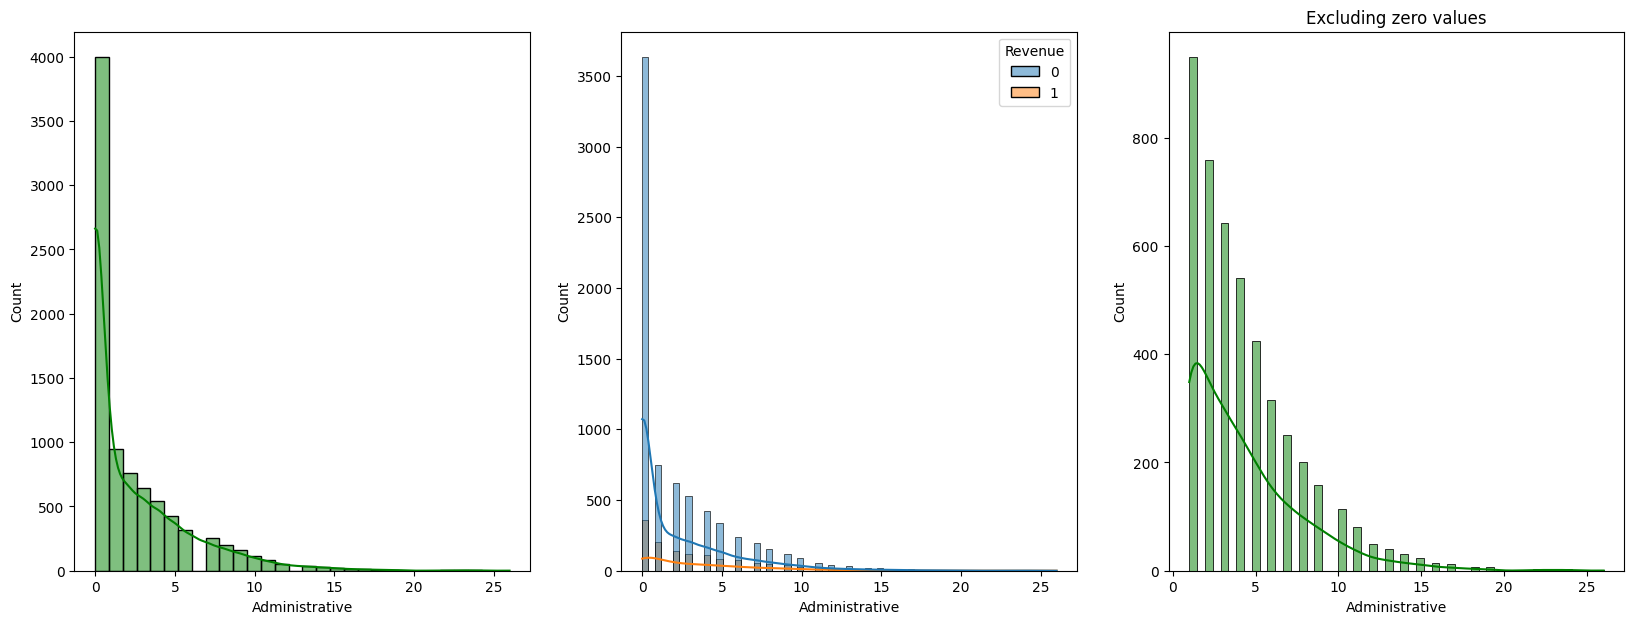

In [15]:
fig, axs = plt.subplots(1,3,figsize=(20,7))
plt.subplot(131)
sns.histplot(data=df,x="Administrative",bins=30,kde=True,color="g")
plt.subplot(132)
sns.histplot(data=df,x='Administrative',kde=True,hue='Revenue')
plt.subplot(133)
sns.histplot(x=df[df["Administrative"] != 0]["Administrative"],kde=True,color="g")
plt.title('Excluding zero values')
plt.show()

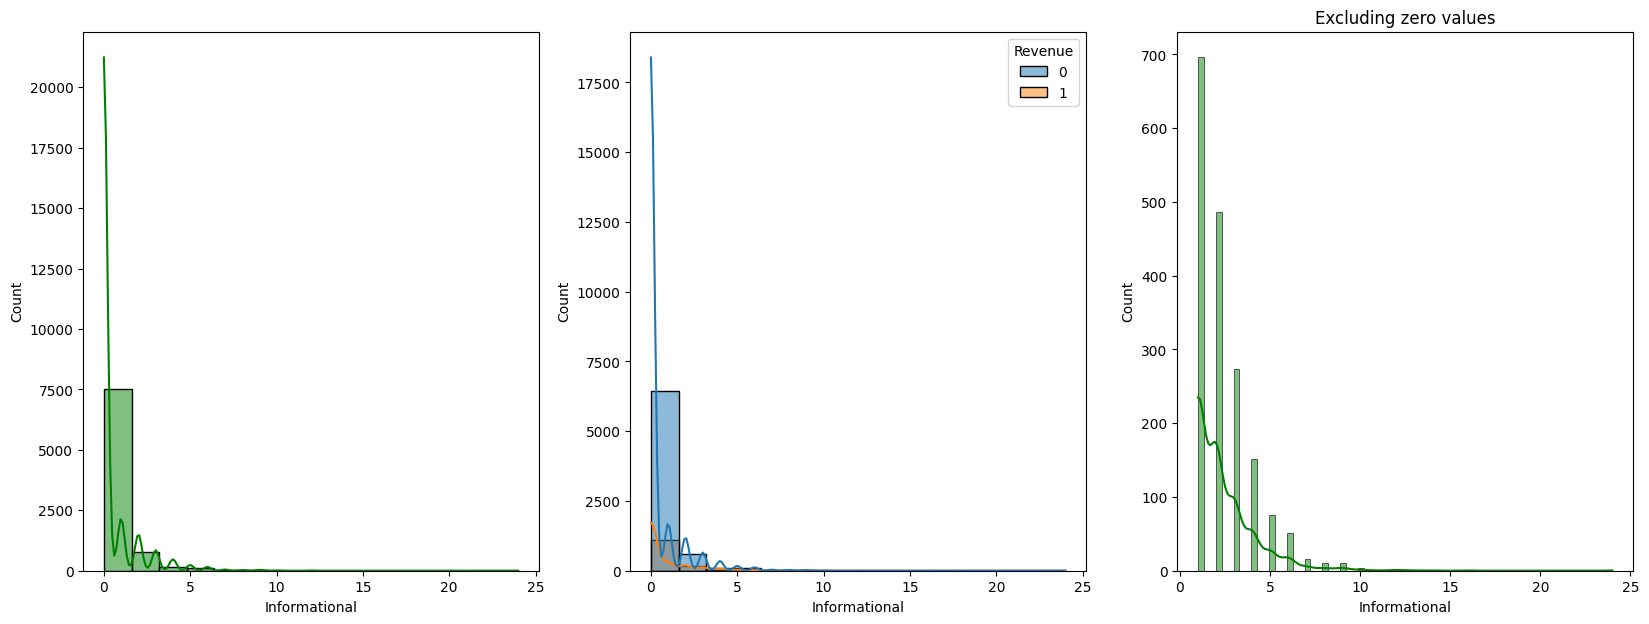

In [16]:
fig, axs = plt.subplots(1,3,figsize=(20,7))
plt.subplot(131)
sns.histplot(data=df,x="Informational",kde=True,color="g")
plt.subplot(132)
sns.histplot(data=df,x='Informational',kde=True,hue='Revenue')
plt.subplot(133)
sns.histplot(x=df[df["Informational"] != 0]["Informational"],kde=True,color="g")
plt.title('Excluding zero values')
plt.show()

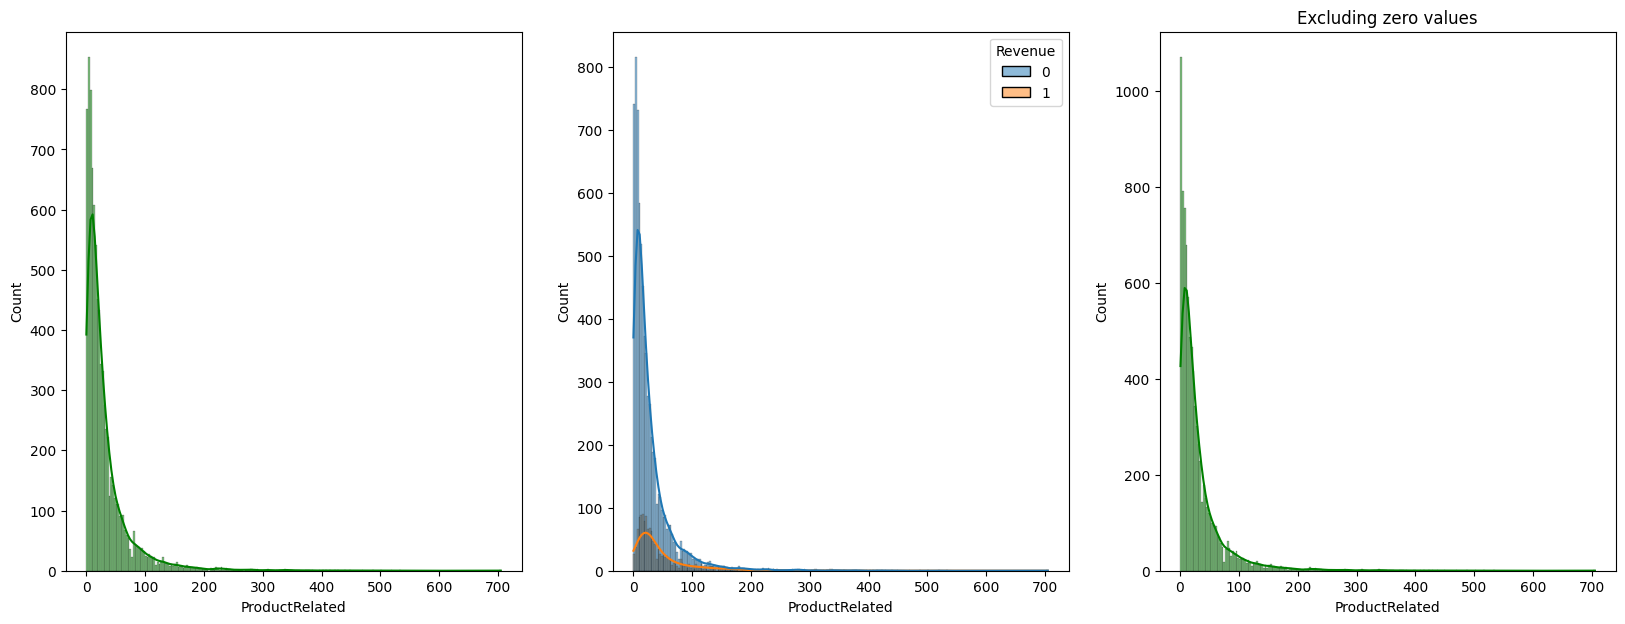

In [17]:
fig, axs = plt.subplots(1,3,figsize=(20,7))
plt.subplot(131)
sns.histplot(data=df,x="ProductRelated",kde=True,color="g")
plt.subplot(132)
sns.histplot(data=df,x='ProductRelated',kde=True,hue='Revenue')
plt.subplot(133)
sns.histplot(x=df[df["ProductRelated"] != 0]["ProductRelated"],kde=True,color="g")
plt.title('Excluding zero values')
plt.show()

<AxesSubplot: xlabel='ProductRelated', ylabel='Count'>

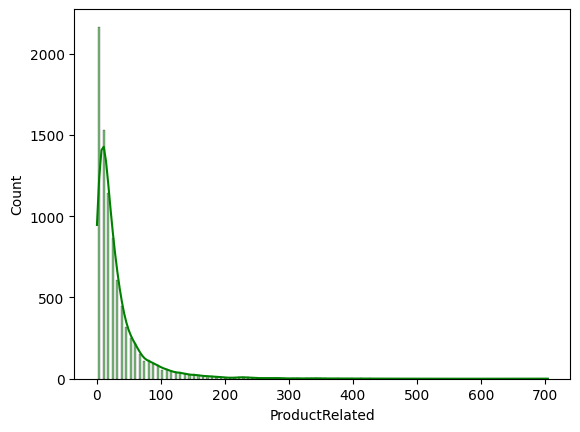

In [18]:
sns.histplot(data=df,x="ProductRelated",kde=True,color="g",shrink=0.5,bins=100)

In [41]:
def plotter(fs,start,stop,splt,rev=False,pert=False):
    global grouped_count,grouped_mean
    def bin_size(start,stop,splt):
        global bin_edges,bin_labels
        bin_labels=[]
        bin_edges=[]
        stopper =0
        zen=stop/splt
        for idx, i in enumerate(range(round(zen))):
            starter =start+stopper
            stopper = start+(splt*(idx+1))
            fin =str(starter) +"-"+ str(stopper)
            bin_labels.append(fin)
            bin_edges.append(starter)
        bin_edges.append(100000)
        bin_edges[0] = start - 0.001
        return bin_edges,bin_labels
    
    bin_size(start,stop,splt)
    df_temp = df
    df_temp['bins_range'] = pd.cut(df_temp[fs], bins=bin_edges, labels=bin_labels, right=True)
    df_temp_1=df_temp[df_temp["Revenue"]==1]
    df_temp_0=df_temp[df_temp["Revenue"]==0]

    grouped_count = df_temp.groupby('bins_range').count().reset_index()
    grouped_count_0 = df_temp_0.groupby('bins_range').count().reset_index()
    grouped_count_1 = df_temp_1.groupby('bins_range').count().reset_index()

    v1 = pd.DataFrame()
    v1['bins_range'] = pd.cut(df_temp[fs], bins=bin_edges, labels=bin_labels, right=True)
    b1 =v1.groupby('bins_range').max()
    bx = b1.reset_index()


    bx["rev_01"]=0
    bx["rev_00"]=0
    for idx, i in enumerate(bx["bins_range"]):
        f =grouped_count.loc[idx,"Revenue"]
        f0 =grouped_count_0.loc[idx,"Revenue"]
        f1 =grouped_count_1.loc[idx,"Revenue"]
        bn1= (f1/f)*100
        bn0= (f0/f)*100
        #b1.loc[i,"rev_perc"]= bn
        #bx["bins_range"]=bn
        bx.iloc[idx,1]=bn0
        bx.iloc[idx,2]=bn1

    g=sns.catplot(data=grouped_count_1, x="bins_range", y=fs, errorbar=("pi", 95), kind="bar",width=0.4,palette="pastel")
    g.set_xlabels(fs+" bins")
    ax2 = plt.twinx()
    if rev==True:
        g="rev_01"
    else:
        g="rev_00"
    sns.lineplot(data=bx, x="bins_range", y=g, marker="o")
    if pert==True:
        ax2.set_ylim(0, 100)
    else:
        pass
    



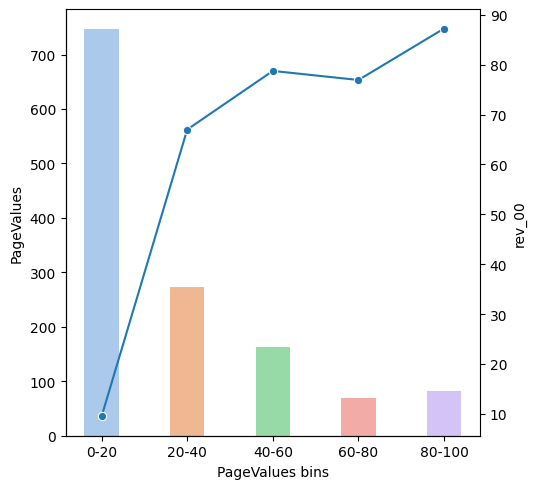

In [42]:
plotter("PageValues",0,100,20)

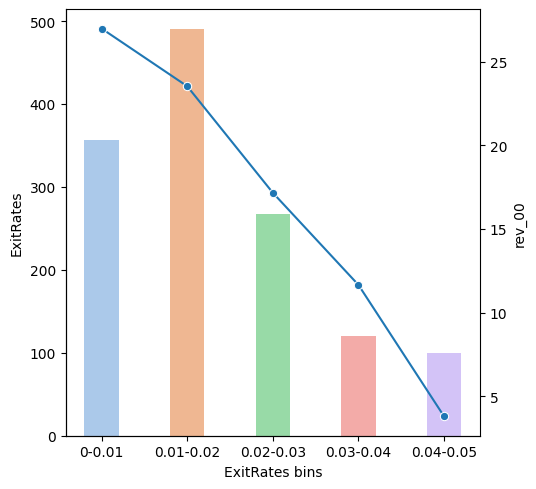

In [43]:
plotter("ExitRates",0,0.05,0.01)

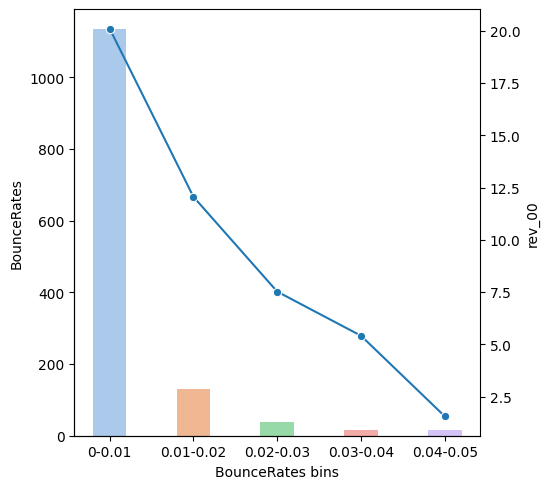

In [44]:
plotter("BounceRates",0,0.05,0.01)

In [45]:
bin_edges,bin_labels

([-0.001, 0.01, 0.02, 0.03, 0.04, 100000],
 ['0-0.01', '0.01-0.02', '0.02-0.03', '0.03-0.04', '0.04-0.05'])

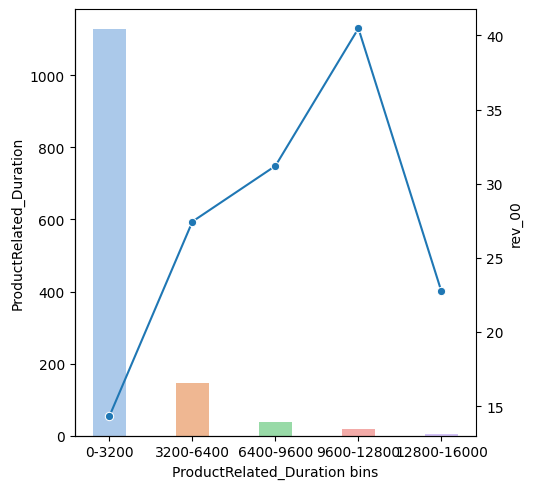

In [48]:
plotter("ProductRelated_Duration",0,16000,3200)

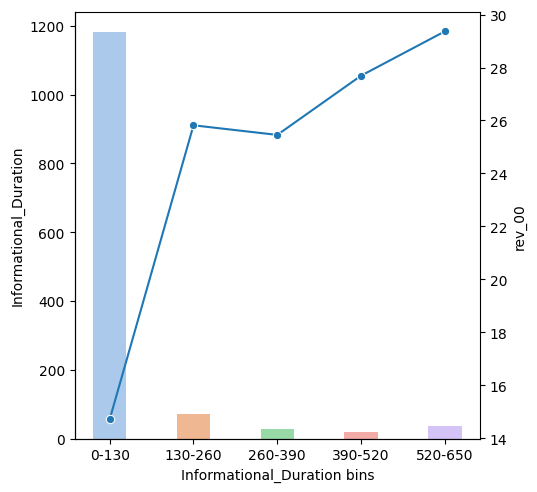

In [49]:
plotter("Informational_Duration",0,650,130)

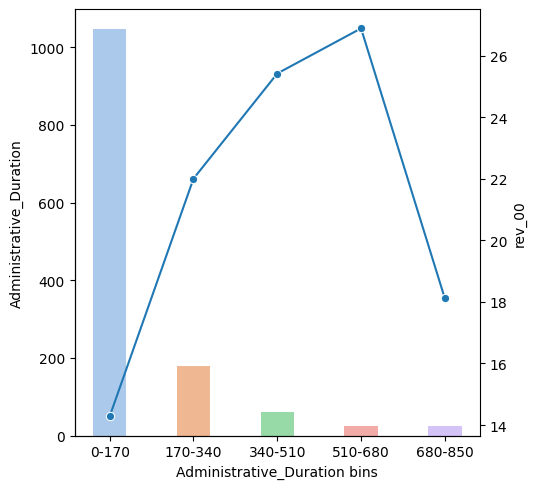

In [51]:
plotter("Administrative_Duration",0,850,170)

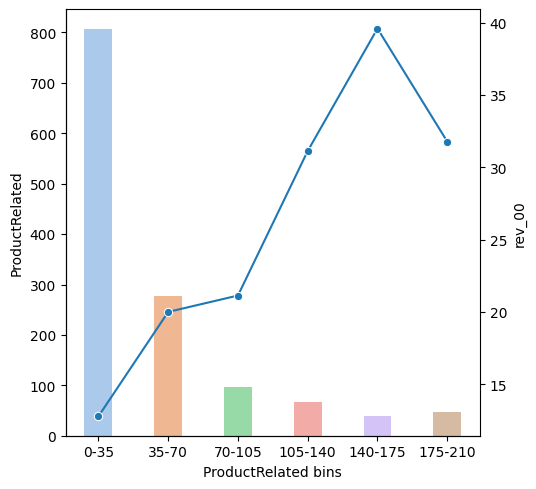

In [52]:
plotter("ProductRelated",0,210,35)

In [47]:
df

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,bins_range
0,8568,0,0.000000,0,0.0,2,0.000000,0.200000,0.200000,0.000000,0.0,Aug,1,1,3,1,Returning_Visitor,0,0,0-3200
1,9207,1,5.000000,0,0.0,2,15.200000,0.000000,0.040000,0.000000,0.0,Aug,1,1,6,3,Returning_Visitor,0,0,0-3200
2,9321,0,0.000000,0,0.0,3,0.000000,0.200000,0.200000,0.000000,0.0,Aug,1,1,3,4,Returning_Visitor,0,0,0-3200
3,8955,4,54.800000,0,0.0,3,20.257143,0.000000,0.028571,0.000000,0.0,Aug,1,1,3,2,Returning_Visitor,0,0,0-3200
4,8180,0,0.000000,0,0.0,4,39.800000,0.000000,0.050000,0.000000,0.0,Aug,1,1,1,3,New_Visitor,0,0,0-3200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8617,10515,14,260.736111,3,186.5,51,2921.902778,0.013661,0.029891,8.339172,0.0,Nov,4,2,7,1,Returning_Visitor,1,1,0-3200
8618,9463,0,0.000000,0,0.0,89,3480.811706,0.002247,0.014700,0.000000,0.0,Nov,4,2,1,1,Returning_Visitor,1,1,0-3200
8619,5092,5,613.500000,0,0.0,470,14129.880800,0.000000,0.003621,13.381494,0.0,Nov,4,2,9,2,Returning_Visitor,1,1,0-3200
8620,12159,1,0.000000,1,66.4,14,668.316667,0.014286,0.028571,44.893459,0.0,Oct,4,2,1,20,Returning_Visitor,1,1,0-3200
